In [1]:
from rxn_insight.reaction import *

# 2. Load sample dataset

In [2]:
df_analyzed = pd.read_parquet(r"../rxninsights-master/data/uspto.gzip")

In [3]:
df_analyzed.keys()

Index(['REACTION', 'MAPPED_REACTION', 'SOLVENT', 'REAGENT', 'CATALYST',
       'N_REACTANTS', 'N_PRODUCTS', 'FG_REACTANTS', 'FG_PRODUCTS', 'PR_RINGS',
       'PP_RINGS', 'PRODUCT_RINGS', 'BYPRODUCTS', 'CLASS', 'NAME', 'REF',
       'TAG', 'SCAFFOLD', 'rxn_str_patt_fp', 'rxn_dif_patt_fp',
       'rxn_str_morgan_fp', 'rxn_dif_morgan_fp', 'TAG2', 'PRODUCT'],
      dtype='object')

In [4]:
r = 'C=Cc1ccccc1.Ic1ccccc1>>C(=C/c1ccccc1)\c1ccccc1'

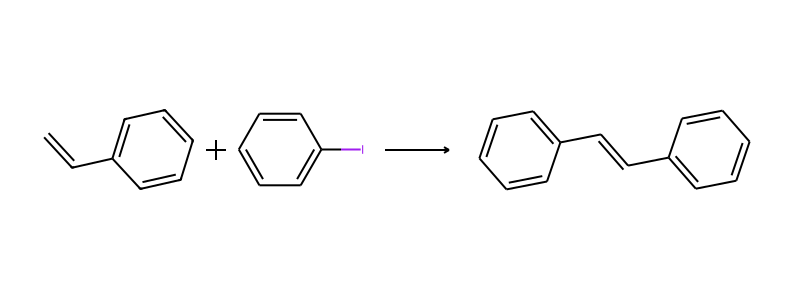

In [5]:
display(SVG(draw_chemical_reaction(r)))

In [6]:
rxn_mapper = RXNMapper()

In [7]:
rxn = Reaction(r, rxn_mapper=rxn_mapper)

In [8]:
rxn.get_reaction_info()

{'REACTION': 'C=Cc1ccccc1.Ic1ccccc1>>C(=C/c1ccccc1)\\c1ccccc1',
 'MAPPED_REACTION': '[CH2:1]=[CH:2][c:3]1[cH:4][cH:5][cH:6][cH:7][cH:8]1.I[c:9]1[cH:10][cH:11][cH:12][cH:13][cH:14]1>>[CH:1](=[CH:2]/[c:3]1[cH:4][cH:5][cH:6][cH:7][cH:8]1)\\[c:9]1[cH:10][cH:11][cH:12][cH:13][cH:14]1',
 'N_REACTANTS': 2,
 'N_PRODUCTS': 1,
 'FG_REACTANTS': ('Aromatic halide', 'Vinyl'),
 'FG_PRODUCTS': (),
 'PARTICIPATING_RINGS_REACTANTS': ('c1ccccc1',),
 'PARTICIPATING_RINGS_PRODUCTS': ('c1ccccc1',),
 'ALL_RINGS_PRODUCTS': ('c1ccccc1', 'c1ccccc1'),
 'BY-PRODUCTS': ('HI',),
 'CLASS': 'C-C Coupling',
 'TAG': '55becfded1a3842d5a03bbf3e1610411c659aff0806930400c4db2ef61f9c87f',
 'SOLVENT': ('',),
 'REAGENT': ('',),
 'CATALYST': ('',),
 'REF': '',
 'NAME': 'Heck terminal vinyl',
 'SCAFFOLD': 'C(=C/c1ccccc1)\\c1ccccc1'}

In [9]:
rxn.suggest_conditions(df_analyzed)

Calculating Tanimoto similarity: 100%|██████████████████████████████████████████| 2047/2047 [00:00<00:00, 53680.34it/s]

Reaction found with similarity of 1.000. This will be our best match.


{'Solvent': '',
 'Catalyst': 'C(C)(=O)[O-].[Pd+2].C(C)(=O)[O-]',
 'Reagent': '[Pd+2].CCN(CC)CC.CC(=O)[O-]'}

In [10]:
rxn.find_neighbors(df_analyzed)

Calculating Tanimoto similarity: 100%|████████████████████████████████████████████| 845/845 [00:00<00:00, 60207.71it/s]

Reaction found with similarity of 1.000. This will be our best match.


,REACTION,MAPPED_REACTION,SOLVENT,REAGENT,CATALYST,N_REACTANTS,N_PRODUCTS,FG_REACTANTS,FG_PRODUCTS,PR_RINGS,PP_RINGS,PRODUCT_RINGS,BYPRODUCTS,CLASS,NAME,REF,SCAFFOLD,PRODUCT,SIMILARITY
index,,,,,,,,,,,,,,,,,,,
480113,C=Cc1ccccc1.Ic1ccccc1>>C(=C/c1ccccc1)\c1ccccc1,[CH2:1]=[CH:2][c:3]1[cH:4][cH:5][cH:6][cH:7][c...,O,[Pd+2].CN(C)C=O.CCCCN(CCCC)CCCC.CC(=O)[O-],C(C)(=O)[O-].[Pd+2].C(C)(=O)[O-],2,1,Aromatic halide.Vinyl,,c1ccccc1,c1ccccc1,c1ccccc1.c1ccccc1,HI,C-C Coupling,Heck terminal vinyl,US06136157,C(=C/c1ccccc1)\c1ccccc1,PJANXHGTPQOBST-VAWYXSNFSA-N,1.000000
435563,C=Cc1ccccc1.Ic1ccccc1>>C(=Cc1ccccc1)c1ccccc1,[CH2:1]=[CH:2][c:3]1[cH:4][cH:5][cH:6][cH:7][c...,CN(C)C=O,[Pd].CCCC[N+](CCCC)(CCCC)CCCC.CC(=O)[O-],C(C)(=O)[O-].C(CCC)[N+](CCCC)(CCCC)CCCC.[Pd],2,1,Aromatic halide.Vinyl,,c1ccccc1,c1ccccc1,c1ccccc1.c1ccccc1,HI,C-C Coupling,Heck terminal vinyl,US05925463,C(=Cc1ccccc1)c1ccccc1,PJANXHGTPQOBST-UHFFFAOYSA-N,1.000000
1210169,C=Cc1ccccc1.Ic1ccccc1>>C(=Cc1ccccc1)c1ccccc1,[CH2:1]=[CH:2][c:3]1[cH:4][cH:5][cH:6][cH:7][c...,,CCN(CC)CC,,2,1,Aromatic halide.Vinyl,,c1ccccc1,c1ccccc1,c1ccccc1.c1ccccc1,HI,C-C Coupling,Heck terminal vinyl,US08309736B2,C(=Cc1ccccc1)c1ccccc1,PJANXHGTPQOBST-UHFFFAOYSA-N,1.000000
361680,C=Cc1ccccc1.Ic1ccccc1>>C(=Cc1ccccc1)c1ccccc1,[CH2:1]=[CH:2][c:3]1[cH:4][cH:5][cH:6][cH:7][c...,CN(C)C=O,[Pd].CCCC[N+](CCCC)(CCCC)CCCC.CC(=O)[O-],C(C)(=O)[O-].C(CCC)[N+](CCCC)(CCCC)CCCC.[Pd],2,1,Aromatic halide.Vinyl,,c1ccccc1,c1ccccc1,c1ccccc1.c1ccccc1,HI,C-C Coupling,Heck terminal vinyl,US05620584,C(=Cc1ccccc1)c1ccccc1,PJANXHGTPQOBST-UHFFFAOYSA-N,1.000000
1704022,C=Cc1ccccc1.Ic1ccccc1>>C(=C/c1ccccc1)\c1ccccc1,[CH2:1]=[CH:2][c:3]1[cH:4][cH:5][cH:6][cH:7][c...,,,,2,1,Aromatic halide.Vinyl,,c1ccccc1,c1ccccc1,c1ccccc1.c1ccccc1,HI,C-C Coupling,Heck terminal vinyl,US09233366B2,C(=C/c1ccccc1)\c1ccccc1,PJANXHGTPQOBST-VAWYXSNFSA-N,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264844,C=CC(C)=O.Clc1cc(Cl)c(I)c(Cl)c1>>CC(=O)/C=C/c1...,[CH3:1][C:2](=[O:3])[CH:4]=[CH2:5].I[c:6]1[c:7...,CN(C)C=O,[Na+].CC(=O)[O-].[Cl-].CCCC[N+](CCCC)(CCCC)CCC...,[Cl-].C(CCC)[N+](CCCC)(CCCC)CCCC.CC(=O)[O-].CC...,2,1,Aromatic halide.Vinyl,,c1ccccc1,c1ccccc1,c1ccccc1,HI,C-C Coupling,OtherReaction,US08357635B2,c1ccccc1,NCFKNCDEZZOLAI-NSCUHMNNSA-N,0.312500
632163,C=Cc1cccnc1.COC(=O)c1ccc(I)cc1-c1ccccc1>>COC(=...,[CH2:9]=[CH:10][c:11]1[cH:12][cH:13][cH:14][n:...,CN1CCCC1=O,CCN(CC)CC.ClCCl.c1ccc(P(c2ccccc2)[c-]2cccc2)cc...,C1=CC=C(C=C1)P([C-]2C=CC=C2)C3=CC=CC=C3.C1=CC=...,2,1,Aromatic halide.Vinyl,,c1ccccc1,c1ccccc1,c1ccccc1.c1ccncc1.c1ccccc1,HI,C-C Coupling,Heck terminal vinyl,US06693123B2,C(=Cc1cccc(-c2ccccc2)c1)c1cccnc1,ORHYEBDWBSSSES-UHFFFAOYSA-N,0.306122
1170826,C=Cc1ccc(OC)cc1.O=Cc1cc(F)ccc1Br>>COc1ccc(/C=C...,[CH3:1][O:2][c:3]1[cH:4][cH:5][c:6]([CH:7]=[CH...,CN(C)C=O,[Pd+2].Cc1ccccc1P(c1ccccc1C)c1ccccc1C.CCN(CC)C...,C(C)(=O)[O-].[Pd+2].C(C)(=O)[O-],2,1,Aromatic halide.Vinyl,,c1ccccc1,c1ccccc1,c1ccccc1.c1ccccc1,HBr,C-C Coupling,Heck terminal vinyl,US08183271B2,C(=C/c1ccccc1)\c1ccccc1,UJOLWBAGGTWWQB-GORDUTHDSA-N,0.304348


In [75]:
fp1=get_fp(r, fp="MACCS", concatenate=True)

In [76]:
r2 = df_analyzed["REACTION"][480113]
fp2 = get_fp(r2)

In [77]:
get_similarity(fp1, fp2)

1.0

In [18]:
fp1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [22]:
fp3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [87]:
np.array(DataStructs.CreateFromBitString("".join(fp1.astype(np.str_))))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [90]:
np.fromiter(df_analyzed["rxn_str_patt_fp"][480113], dtype=np.int64)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [55]:
fp3=np.array(DataStructs.CreateFromBitString(df_analyzed["rxn_str_patt_fp"][480113]))

In [57]:
fp4=np.array(DataStructs.CreateFromBitString("".join(get_fp(df_analyzed["REACTION"][480113], fp="MACCS", concatenate=True).astype(np.str_))))

In [56]:
get_similarity(fp1, fp3)

0.8

In [58]:
get_similarity(fp1, fp4)

0.8

In [78]:
fp5=np.array(DataStructs.CreateFromBitString("".join(get_fp(Reaction(df_analyzed["REACTION"][480113]).reaction, fp="MACCS", concatenate=True).astype(np.str_))))

In [79]:
get_similarity(fp1, fp5)

0.8

In [84]:
get_fp(r)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [83]:
get_fp(Reaction(r).reaction)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [80]:
fp5 - fp1

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -2, -2,  0, -2,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

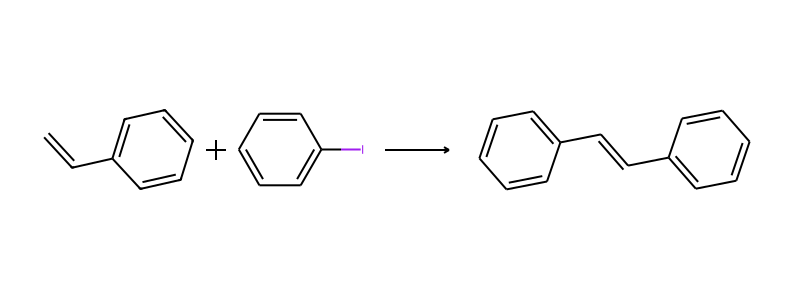

In [66]:
display(SVG(draw_chemical_reaction(r)))

In [68]:
print(r)
print(df_analyzed["REACTION"][480113])

C=Cc1ccccc1.Ic1ccccc1>>C(=C/c1ccccc1)\c1ccccc1
C=Cc1ccccc1.Ic1ccccc1>>C(=C/c1ccccc1)\c1ccccc1


In [69]:
get_fp(r)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

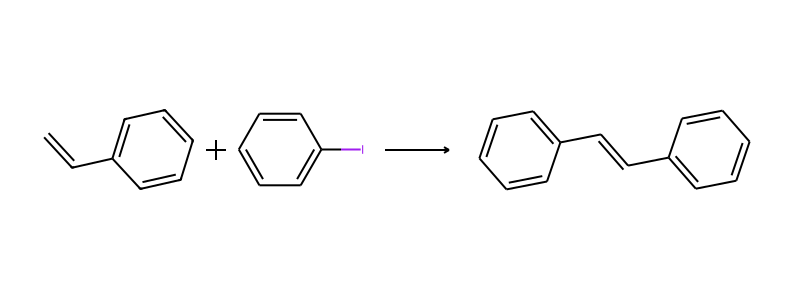

In [67]:
display(SVG(draw_chemical_reaction(df_analyzed["REACTION"][480113])))

In [ ]:
rxn.find_neighbors(df_analyzed, fp="Morgan")

In [ ]:
rxn.suggested_solvent

In [8]:
df_analyzed.head(1)

,REACTION,MAPPED_REACTION,SOLVENT,REAGENT,CATALYST,N_REACTANTS,N_PRODUCTS,FG_REACTANTS,FG_PRODUCTS,PR_RINGS,...,NAME,REF,TAG,SCAFFOLD,rxn_str_patt_fp,rxn_dif_patt_fp,rxn_str_morgan_fp,rxn_dif_morgan_fp,TAG2,PRODUCT
index,,,,,,,,,,,,,,,,,,,,,
0,CCS(=O)(=O)Cl.OCCBr>>CCS(=O)(=O)OCCBr,Cl[S:3]([CH2:2][CH3:1])(=[O:4])=[O:5].[OH:6][C...,CCN(CC)CC,CCOCC,,2,1,Primary alcohol.Sulfonyl halide,Sulfonate,,...,Formation of Sulfonic Esters,US03930836,76a2f1ce13fb019af608455a0d79fe83b29c455d623b27...,,0000000000000000000000000000000100000000000000...,0000000000000000000000000000000100000001100000...,0000000000000000000000000000000001000000000000...,0000000000000100000000000000010002000000000000...,e7708aa65b3d8696add9aec26cae169160bb027d6d2772...,VWKCDMZFOOUXSF-UHFFFAOYSA-N


In [29]:
np.array(DataStructs.CreateFromBitString("".join(fp2.astype(np.str_))))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [9]:
from tqdm import tqdm

In [ ]:
DataStructs.

In [31]:
rxn_mapper = RXNMapper()
fg = pd.read_json('data/functional_groups.data', orient='records', lines=True)
smirks = pd.read_json('data/smirks.data', orient='records', lines=True)

In [37]:
bad_ids = []
for i in tqdm(df_analyzed.index):
    r1 = df_analyzed["REACTION"][i]
    fp1 = "".join(get_fp(r1, fp="MACCS", concatenate=True).astype(np.str_))
    df_analyzed.loc[i, "rxn_str_patt_fp"] = fp1

100%|█████████████████████████████████████████████████████████████████████| 1779551/1779551 [17:04:59<00:00, 28.94it/s]


In [38]:
df_analyzed.to_parquet("data/uspto.gzip")

In [34]:
df_analyzed["REACTION"][8]

'Cl>>Cl'

In [39]:
df_analyzed.head()

,REACTION,MAPPED_REACTION,SOLVENT,REAGENT,CATALYST,N_REACTANTS,N_PRODUCTS,FG_REACTANTS,FG_PRODUCTS,PR_RINGS,...,NAME,REF,TAG,SCAFFOLD,rxn_str_patt_fp,rxn_dif_patt_fp,rxn_str_morgan_fp,rxn_dif_morgan_fp,TAG2,PRODUCT
index,,,,,,,,,,,,,,,,,,,,,
0,CCS(=O)(=O)Cl.OCCBr>>CCS(=O)(=O)OCCBr,Cl[S:3]([CH2:2][CH3:1])(=[O:4])=[O:5].[OH:6][C...,CCN(CC)CC,CCOCC,,2,1,Primary alcohol.Sulfonyl halide,Sulfonate,,...,Formation of Sulfonic Esters,US03930836,76a2f1ce13fb019af608455a0d79fe83b29c455d623b27...,,0000000000000000000000000000000100000000000000...,0000000000000000000000000000000100000001100000...,0000000000000000000000000000000001000000000000...,0000000000000100000000000000010002000000000000...,e7708aa65b3d8696add9aec26cae169160bb027d6d2772...,VWKCDMZFOOUXSF-UHFFFAOYSA-N
1,CS(=O)(=O)Cl.OCCCBr>>CS(=O)(=O)OCCCBr,Cl[S:2]([CH3:1])(=[O:3])=[O:4].[OH:5][CH2:6][C...,CCN(CC)CC,CCOCC,,2,1,Primary alcohol.Sulfonyl halide,Mesylate,,...,Formation of Sulfonic Esters,US03930836,2fa969eb2c954bb96793348a1b2335ec63fbd290dadec6...,,0000000000000000000000000000000100000000000000...,0000000000000000000000000000000100000001100000...,0000100000000000000000000000000001000000000000...,0000100000000100000000000000000002000000000000...,cb77b899e4adf980b1def97230ef2861660fd7f9602260...,RZBUBNOTSHCHRT-UHFFFAOYSA-N
2,CC(C)CS(=O)(=O)Cl.OCCCl>>CC(C)CS(=O)(=O)OCCCl,Cl[S:5]([CH2:4][CH:2]([CH3:1])[CH3:3])(=[O:6])...,CCN(CC)CC,CCOCC,,2,1,Primary alcohol.Sulfonyl halide,Sulfonate,,...,Formation of Sulfonic Esters,US03930836,76a2f1ce13fb019af608455a0d79fe83b29c455d623b27...,,0000000000000000000000000000000100000000000000...,0000000000000000000000000000000100000001100000...,0100000000000000000000000000000001000000000000...,0200000000000100000000000000000002000000000000...,e7708aa65b3d8696add9aec26cae169160bb027d6d2772...,TZEHOSBZAOXGPY-UHFFFAOYSA-N
3,CCS(=O)(=O)Cl.OCCBr>>CCS(=O)(=O)OCCBr,Cl[S:3]([CH2:2][CH3:1])(=[O:4])=[O:5].[OH:6][C...,CCN(CC)CC,CCOCC,,2,1,Primary alcohol.Sulfonyl halide,Sulfonate,,...,Formation of Sulfonic Esters,US03930839,76a2f1ce13fb019af608455a0d79fe83b29c455d623b27...,,0000000000000000000000000000000100000000000000...,0000000000000000000000000000000100000001100000...,0000000000000000000000000000000001000000000000...,0000000000000100000000000000010002000000000000...,e7708aa65b3d8696add9aec26cae169160bb027d6d2772...,VWKCDMZFOOUXSF-UHFFFAOYSA-N
4,CS(=O)(=O)Cl.OCCCBr>>CS(=O)(=O)OCCCBr,Cl[S:2]([CH3:1])(=[O:3])=[O:4].[OH:5][CH2:6][C...,CCN(CC)CC,CCOCC,,2,1,Primary alcohol.Sulfonyl halide,Mesylate,,...,Formation of Sulfonic Esters,US03930839,2fa969eb2c954bb96793348a1b2335ec63fbd290dadec6...,,0000000000000000000000000000000100000000000000...,0000000000000000000000000000000100000001100000...,0000100000000000000000000000000001000000000000...,0000100000000100000000000000000002000000000000...,cb77b899e4adf980b1def97230ef2861660fd7f9602260...,RZBUBNOTSHCHRT-UHFFFAOYSA-N
